In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
import cv2
import glob

%matplotlib inline

images = glob.glob("images/*.png")

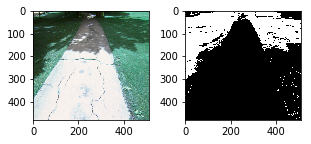

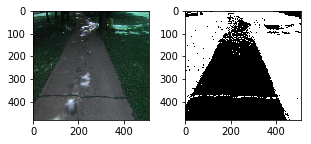

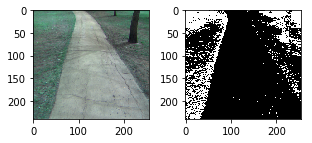

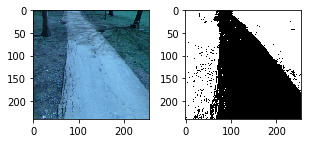

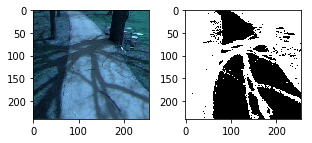

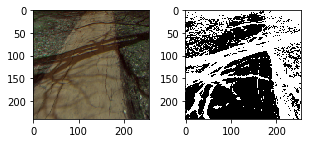

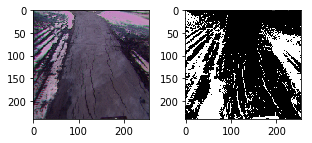

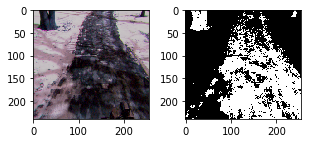

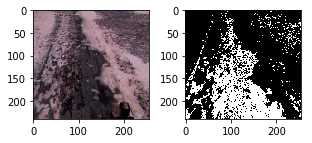

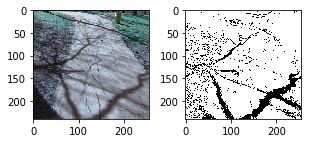

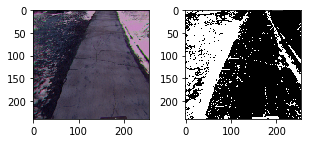

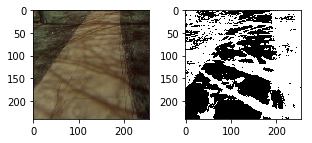

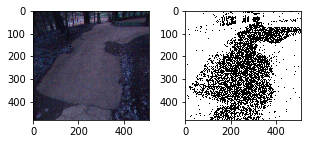

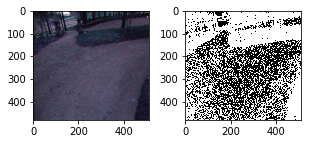

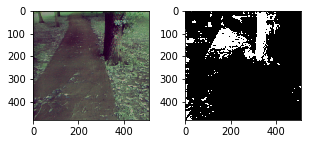

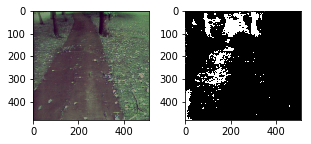

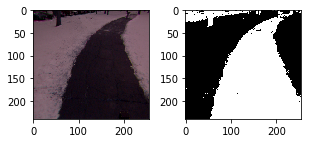

In [7]:
# Shadow detection using twice HSV transfomration
# https://www.spiedigitallibrary.org/conference-proceedings-of-spie/8921/1/The-research-on-the-shadow-detection-from-high-resolution-remote/10.1117/12.2030998.short?SSO=1
for src in images:
    img = cv2.imread(src)
    base_img = img
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # We are gonna use only red channel at the end
    # normalize hue chanel to 0-255
    hsv[:, :, 0] = ((255.0/179.0)*hsv[:,:,0])
    
    # convert to hsv again, h channel like red, so we don't need to convert to rgb first
    hsv2 = cv2.cvtColor(hsv, cv2.COLOR_RGB2HSV)
    red = hsv2[:, :, 0]

    # Perform otsu thresholding and invert the image
    # Anything smaller than threshold is white, anything greater is black
    _, out = cv2.threshold(red, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    f, (ax1, ax2) = plt.subplots(1,2,figsize=(5,2))
    ax1.imshow(base_img)
    ax2.imshow(out, cmap='gray')




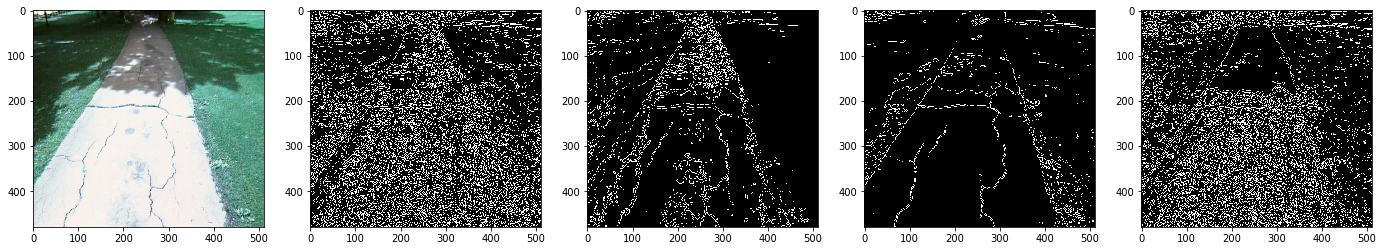

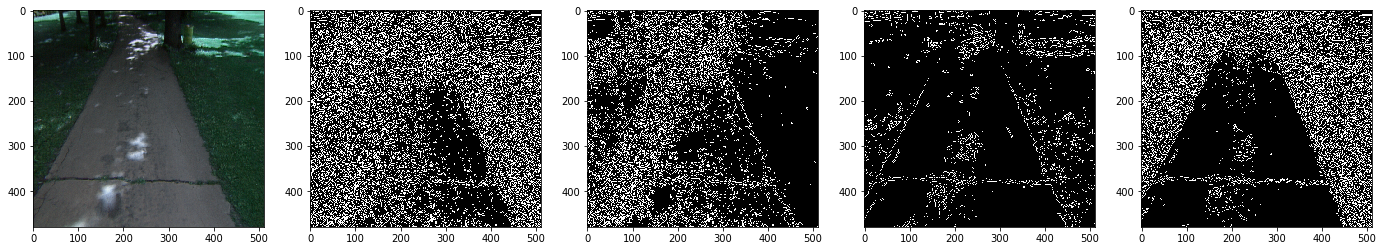

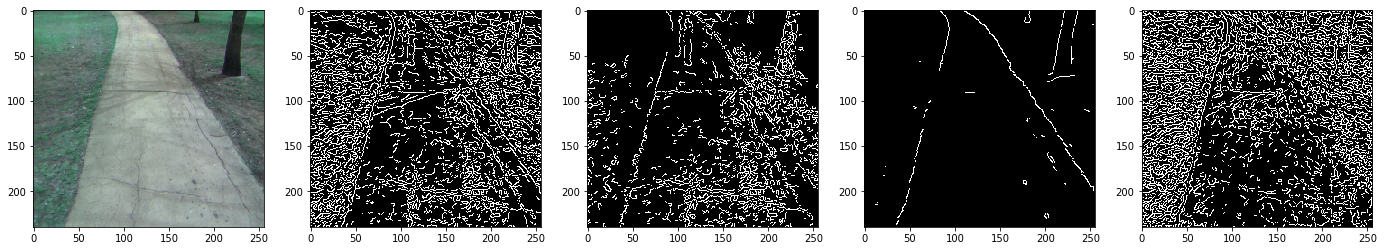

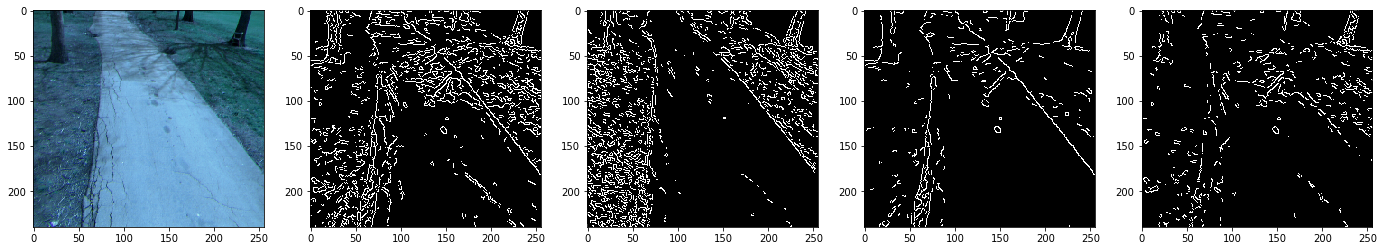

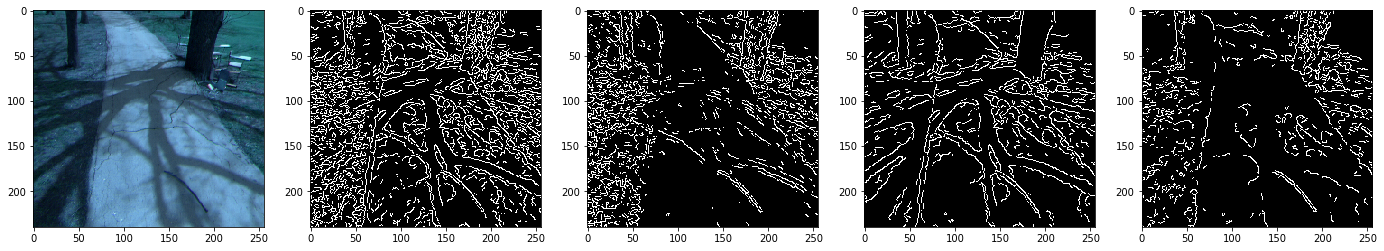

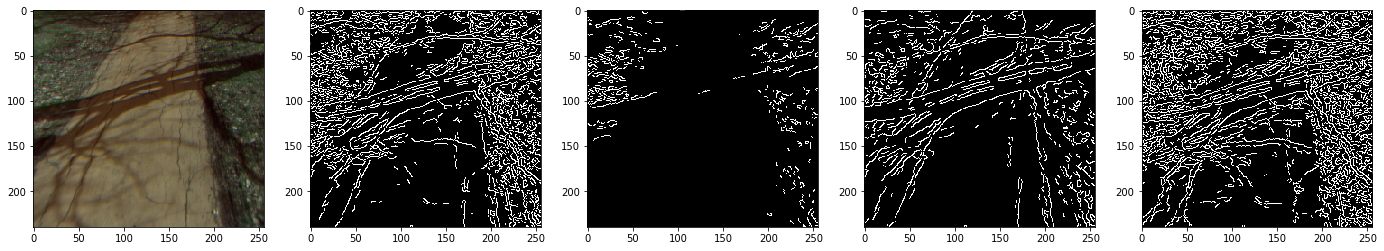

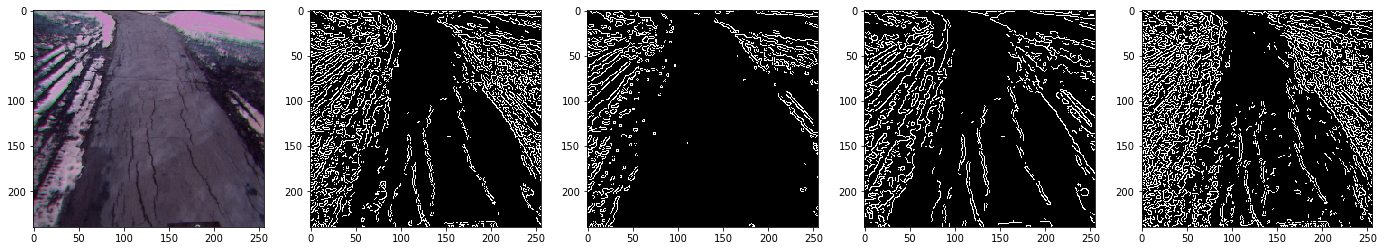

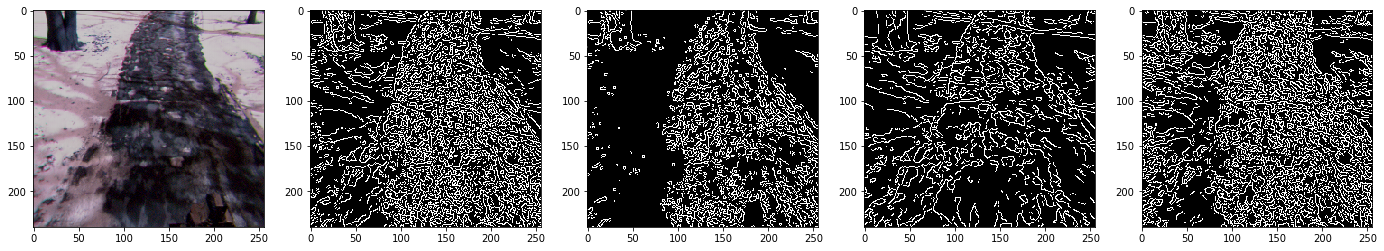

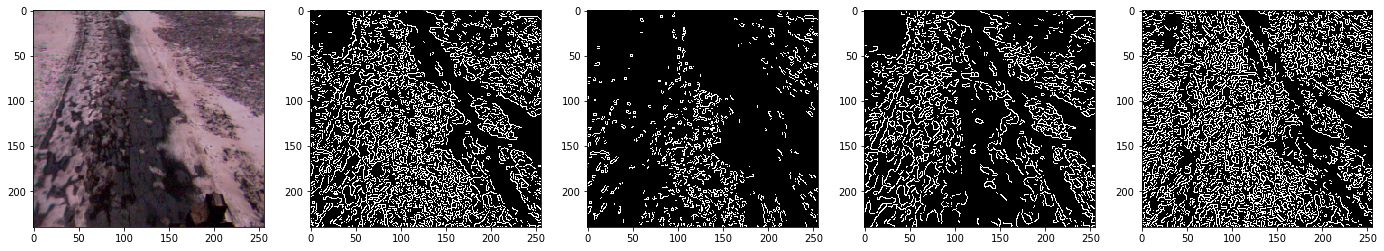

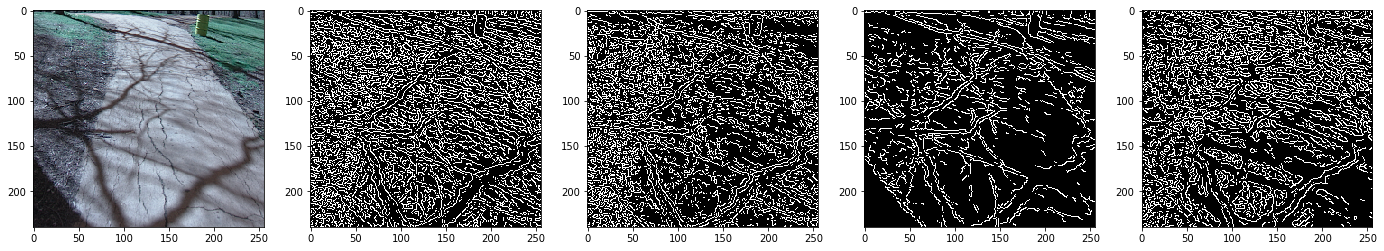

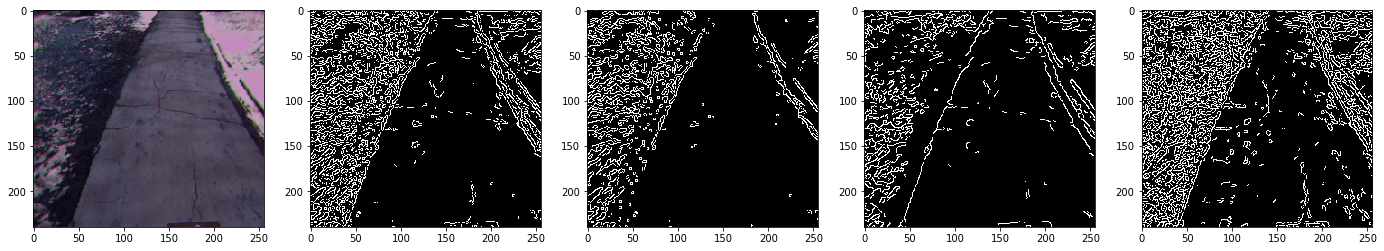

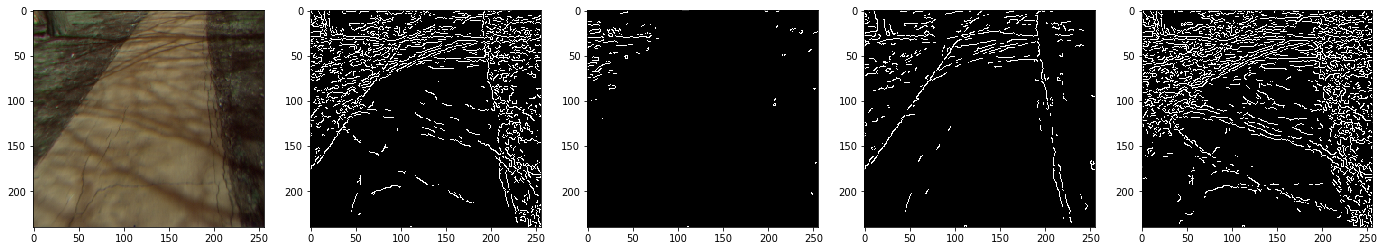

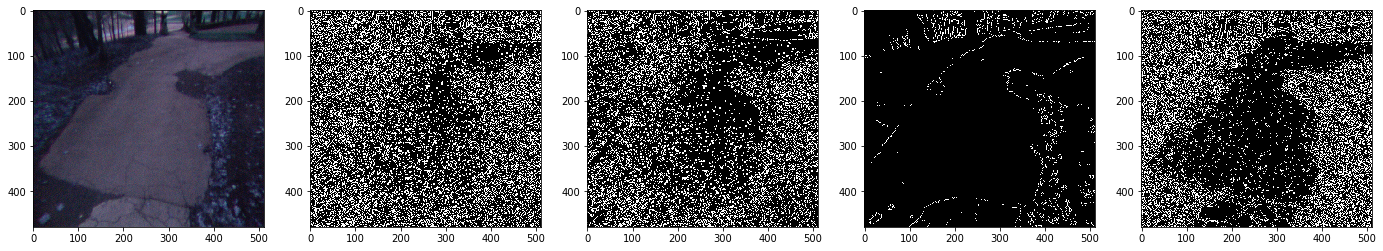

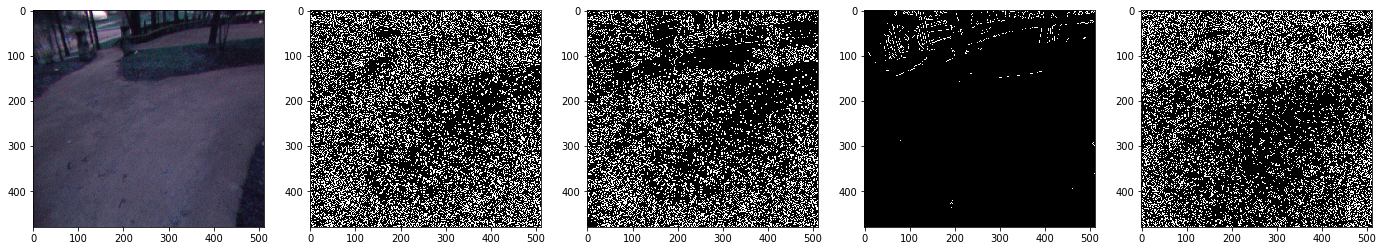

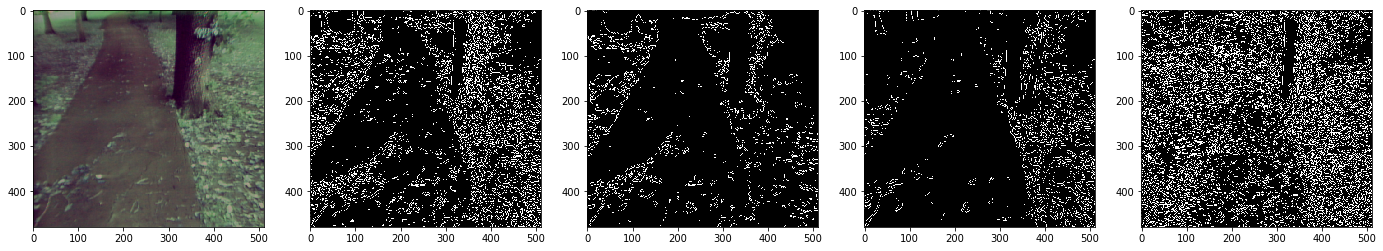

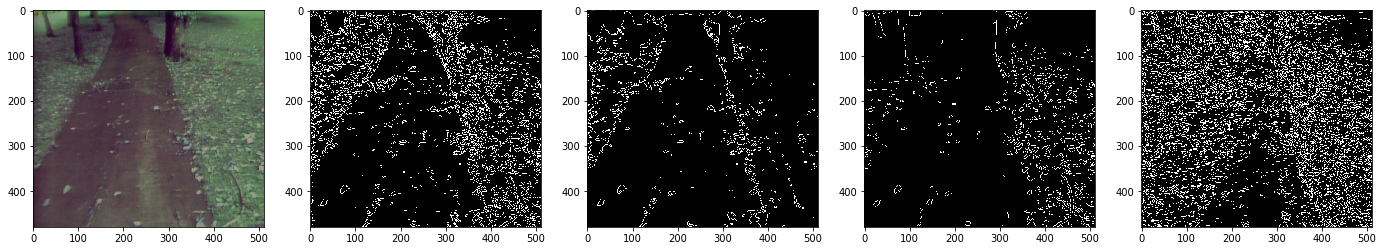

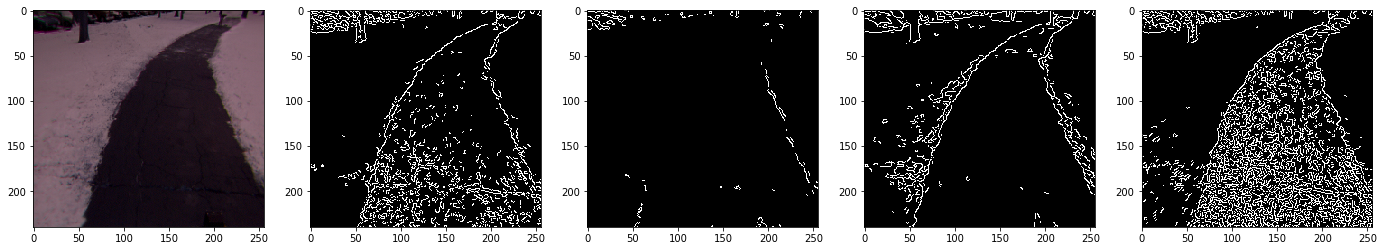

In [12]:

def auto_canny(image, sigma=0.15):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged


for src in images:
    image = cv2.imread(src)
    base_image = image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    image = cv2.medianBlur(image, 3)
    h,l,s = cv2.split(image)

    min_thresh = 180

    canny = auto_canny(image)
    canny_h = auto_canny(h)
    canny_l = auto_canny(l)
    canny_s = auto_canny(s)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))


    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24,9))
    ax1.imshow(base_image)
    ax2.imshow(canny,cmap='gray')
    ax3.imshow(canny_h, cmap='gray')
    ax4.imshow(canny_l, cmap='gray')
    ax5.imshow(canny_s, cmap='gray')